# Gradient Descent

Reference: https://towardsdatascience.com/implementing-gradient-descent-in-python-from-scratch-760a8556c31f

Each feature has a certain importance in terms of predicting power. This importance is described by the weights. A method to calculate these weights is called **gradient descend**.

The **gradient descent** is an optimisation algorithm which calculates the weights of the model, with the goal of minimising the cost, which is the total sum of all the distances between the real data point and the predicted one.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
archive='./datasets/advertising.csv.zip'
!curl --silent --location --output $archive https://www.kaggle.com/api/v1/datasets/download/sazid28/advertising.csv
!unzip $archive -d ./datasets
!rm -rf $archive

Archive:  ./datasets/advertising.csv.zip
  inflating: ./datasets/Advertising.csv  


In [3]:
df = pd.read_csv('./datasets/Advertising.csv')
df = df.drop(df.columns[0], axis='columns')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
x = df[['TV', 'radio', 'newspaper']]
y = df['sales']

As all these sales might be on different scales, we then normalise $x$ and $y$.

In [5]:
y = np.array((y - y.mean()) / y.std())
x = x.apply(lambda c : (c - c.mean()) / c.std(), axis=0)

To implement a gradient descent algorithm we need to follow 4 steps:
- Randomly initialize the bias and the weights
- Calculate predicted value of y that is Y given the bias and the weight
- Calculate the cost function from predicted and actual values of Y
- Calculate gradient and the weights

The next step randomly initialises the bias and the weights

In [6]:
def initialize(size):
    bias = np.random.random(1)[0]
    weights = np.random.random(size)
    return bias, weights

Using the bias and the weights, we calculate the first approximation

In [7]:
def predict(bias, weights, x):
    return bias + np.dot(x, weights)

Now we need to calculate the cost of the prediction compared to the initial values

In [8]:
def get_cost(y, y_hat):
    y_resd = y - y_hat
    return np.sum(np.dot(y_resd.T, y_resd)) / len(y - y_resd)

In [9]:
def update(x, y, y_hat, bias, weights, learning_rate):
    db = (np.sum(y_hat - y) * 2) / len(y)
    dw = (np.dot((y_hat - y), x) * 2) / len(y)
    new_bias = bias - learning_rate * db
    new_weights = weights - learning_rate * dw
    return new_bias, new_weights

In [10]:
def gradient_descent(x, y, learning_rate, epochs):
    bias, weights = initialize(x.shape[1])
    
    stats = pd.DataFrame(columns=['iteration', 'cost', 'bias', 'weights'])
    
    for index in range(epochs):
        y_hat = predict(bias, weights, x)
        cost = get_cost(y, y_hat)
        if (index % 10 == 0):
            # pass
            # stats.append((index, cost, bias, weights), ignore_index=True)
            stats.loc[len(stats)] = (index, cost, bias, weights)
            
        bias, weights = update(x, y, y_hat, bias, weights, 0.01)
    
    return stats, bias, weights

In [11]:
stats, bias, weights = gradient_descent(x, y, learning_rate=0.01, epochs=2000)
stats

,iteration,cost,bias,weights
0,0,1.577304,9.236144e-01,"[0.9599866193114989, 0.15359224442019115, 0.79..."
1,10,1.120162,7.546602e-01,"[0.9183854456954209, 0.17359949346758913, 0.67..."
2,20,0.810158,6.166124e-01,"[0.8853087406111174, 0.1976492710342254, 0.571..."
3,30,0.598316,5.038172e-01,"[0.8589733143398592, 0.223673610452914, 0.4864..."
4,40,0.452448,4.116553e-01,"[0.8379769341578156, 0.2502391479249616, 0.415..."
...,...,...,...,...
195,1950,0.102275,-2.300829e-17,"[0.753065911773521, 0.5364815499425427, -0.004..."
196,1960,0.102275,-2.784886e-17,"[0.7530659117735254, 0.5364815499433379, -0.00..."
197,1970,0.102275,-3.135717e-17,"[0.7530659117735289, 0.5364815499440366, -0.00..."
198,1980,0.102275,-3.415493e-17,"[0.7530659117735322, 0.5364815499446505, -0.00..."


Text(0, 0.5, 'MSE')

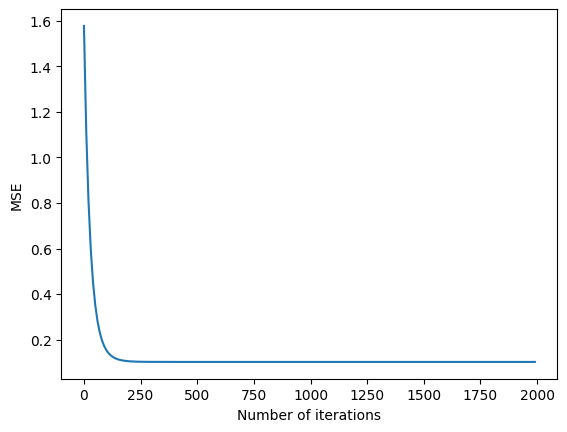

In [12]:
# %matplotlib inline
plt.plot(stats.iteration, stats.cost)
plt.xlabel('Number of iterations')
plt.ylabel('MSE')